<img src="./img/vs265header.svg"/>


<h1 align="center">Lab 3 - Unsupervised Learning </h1>
<h2 align="center"> Part 1 - Simple Datasets </h2>

In [1]:
%pylab inline

import matplotlib.animation as animation
import base64

import utils.anim as anim
import utils.lab3utils as util

Populating the interactive namespace from numpy and matplotlib


In [2]:
# WINDOWS USERS ONLY:
# the animations in this notebook generate small video files stored in the ./utils/ directory
# running this cell will clear those files for you.

# please run this cell right before turning in your problem set

anim.clearFiles()

## 1. Hebbian Learning as Neural PCA

The file `data/data2d.npz` contains two arrays of data that will be used for this problem, $D_1$ and $D_2$, each of which contains 1000 data points in two dimensions. We load it in the cell below.

In [3]:
#first we load data2d.npz
d = np.load('./data/data2d.npz')
D1,D2 = d['D1'],d['D2']

### Unconstrained Hebbian Learning

Train a single linear neuron on this data using Hebbian learning (unconstrained). Plot the weight vector along with the data on each weight update.

The data-loading and results-plotting code has been provided for you. You just need to add the missing lines to the function `hebbLearn` below.

In [4]:
def hebbLearn(dataset,weights,learningRate):
    """
    Weight update with a Hebbian rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Hebbian-updated weight matrix 
                                 of linear transformation of input data
                                 
    NOTE: if you add any additional parameters to this function, you need to
    also add them to the "argumentsForHebbLearn" list variable
    """
    
    output = weights.T @ dataset # YOUR CODE - compute neuron output for all data (can be done as one line)
    
    dw = np.mean(output @ dataset.T, axis=1) # YOUR CODE - compute dw: Hebbian learning rule 

    weights += dw * learningRate # YOUR CODE - update weight vector by dw
    
    return weights

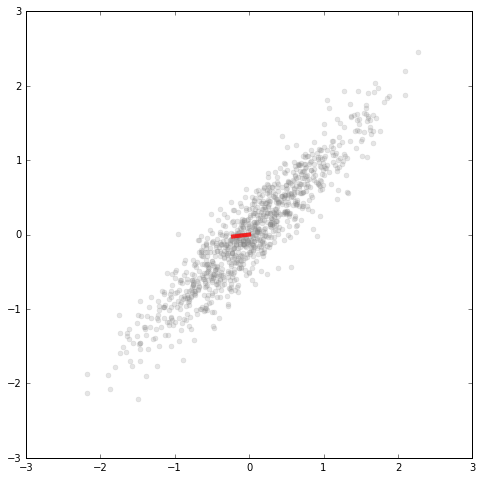

In [5]:
# first we set the hyperparameters
numTrials = 50
learningRate = 0.01

# now we initialize the run and view the data
figure,plottedWeightVector,weights,learningRate = util.initialize(D1)

In [6]:
argumentsForHebbLearn = [hebbLearn,D1,plottedWeightVector,weights,learningRate]
    
hebbAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForHebbLearn,
                                    frames=numTrials, 
                                    )

anim.display_animation(hebbAnim,fps=75)

Describe your results. What happens when you apply Hebbian learning to this dataset?

##### YOUR ANSWER HERE


The weight vector aligns with the principal component of the data distribution but grows without bound as we increase iterations.

### Oja's Rule

Now apply Oja’s single-neuron learning rule to constrain the growth of
the weight vector, and again show how the weight vector evolves during
learning. As before, you only need to add a few lines to the `ojaLearn` function below.

In [7]:
def ojaLearn(dataset,weights,learningRate):
    """
    Weight update with the Oja rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Oja-updated weight matrix 
                                 of linear transformation of input data
    
    NOTE: if you add any additional parameters to this function, you need to
    also add them to the "argumentsForOjaLearn" list variable
    """
    
    output = weights.T @ dataset # YOUR CODE - compute neuron output for all data
    
    dw = np.sum(output @ dataset.T, axis=1) - np.sum(output * output, axis=1) * weights # YOUR CODE -  compute dw: Oja learning rule 

    weights += learningRate * dw # YOUR CODE - update weight vector by dw
    
    return weights

In [8]:
# first we set the hyperparameters
numTrials = 150
learningRate = 0.0005

# now we initialize the run
figure,plottedWeightVector,weights,learningRate = util.initialize(D1)

argumentsForOjaLearn = [ojaLearn,D1,plottedWeightVector,weights,learningRate]

ojaAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForOjaLearn,
                                    frames=numTrials, 
                                    )

anim.display_animation(ojaAnim,fps=75)

What is different about the weight vector learned by Oja's Rule?

The weight vector ends up in the same direction as the weight vector learned with pure hebbian learning along the principal axis of the data distribution. However, due to the decay term in Oja's rule, the magnitude of $w$ does not continue to grow and approaches a steady magnitude of about unity.

### Sanger's Rule 

Use Sanger’s rule to train two neurons to represent the principal components
of the data.  Make sure you run the algorithm for long enough (>1000 steps)!

In [11]:
def sangerLearn(dataset,weights,learningRate):
    """
    Weight update with the Sanger rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
                                 
    NOTE: if you add any additional parameters to this function, you need to
    also add them to the "argumentsForOjaLearn" list variable
    """
    
    output = weights.T @ dataset # [I x O] @ [I x 1000] = [O x 1000] YOUR CODE - compute neuron output for all data
    numOutputs = output.shape[0]
    
    residual = dataset # YOUR CODE - what does the "residual" term start out as?
    # HINT: Sanger's rule for one neuron reduces to Oja's rule
    
    dw = np.zeros(weights.shape)
    
    for i in range(numOutputs):
        residual = residual - weights[:, i, None] @ output[None, i]
        dw[:, i] = np.sum(output[i] * residual, axis=1)
        
    weights += dw*learningRate # update weight vector by dw
    
    return weights

In [13]:
# first we set the hyperparameters
numTrials = 1500
learningRate = 50

# now we initialize the run and view the data
figure,plottedWeightVectors,weights,learningRate = util.initialize(D1,numOutputs=2)

argumentsForSangerLearn = [sangerLearn,D1,plottedWeightVectors,weights,learningRate]

sangerAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForSangerLearn, 
                                    frames=numTrials, 
                                    )
anim.display_animation(sangerAnim,fps=75)

What is the angle between the two weight vectors?

##### YOUR ANSWER HERE

The angle between the two weight vectors approaches $\frac{\pi}{2}$ as we increase number of iterations, which is what we expect if the weight vectors are extracting the top two eigenvalues of covariance matrix, which should be orthogonal.

### Non-Gaussian Data

Now, run the cells below to load the dataset `D2` and learn weight vectors using the vanilla Hebb's rule, Oja's rule, and Sanger's rule (with two components) code that you wrote. 

What's different about the results from this dataset? Can you explain why there's a difference? 

Don't worry if your Sanger-trained network doesn't converge well, so long as it works on the first dataset.

##### YOUR ANSWER HERE

The angle and magnitude of the learned weight vectors using Hebb's rule, Oja's rule, and Sanger's rule are all more or less the same as before. However, the distribution of the input data is no longer gaussian, so the principal components do not describe all the detail of the underlying distribution. However, it seems that the distrubtion still has the most  variance along the same directions as before.

In [15]:
numTrials = 250
learningRate = 0.1

figure,plottedWeightVector,weights,learningRate = util.initialize(D2)

argumentsForHebbLearn = [hebbLearn,D2,plottedWeightVector,weights,learningRate] 

hebbAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                     fargs=argumentsForHebbLearn,
                                    frames=numTrials, 
                                    )

anim.display_animation(hebbAnim,fps=75)

In [16]:
numTrials = 250
learningRate = 0.05

figure,plottedWeightVector,weights,learningRate = util.initialize(D2)
argumentsForOjaLearn = [ojaLearn,D2,plottedWeightVector,weights,learningRate]

ojaAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs= argumentsForOjaLearn,
                                    frames=numTrials, 
                                    )
anim.display_animation(ojaAnim,fps=75)

In [17]:
numTrials = 1000
learningRate = 1

figure,plottedWeightVectors,weights,learningRate = util.initialize(D2, numOutputs=2)
argumentsForSangerLearn = [sangerLearn,D2,plottedWeightVectors,weights,learningRate]

sangerAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForSangerLearn,
                                    frames=numTrials, 
                                    )
anim.display_animation(sangerAnim,fps=75)

### Winner-Take-All Networks



Now, train a 4-unit Winner-Take-All network using the standard competitive learning rule as in equation 9.7 from Hertz, Krogh, and Palmer. *HINT:* look up the numpy function `argmax`.

Don't worry if it takes multiple runs to get your algorithm to converge to the correct solution. Unlike Hebbian learning and other PCA methods, WTA learning is finicky -- the results are highly dependent on the initialization, which is typically random. If you want to make sure that your algorithm is coded correctly, pass `goodWeights=True` to the function `initializeWTA` below, which gives a non-random initialization that will work if you've coded WTA correctly.

Once you've got the basic algorithm working, implement one (or more) of the strategies suggested on p222 of Hertz, Krogh, and Palmer.

In [22]:
def WTALearn(dataset,weights,learningRate):
    """
    Weight update with the WTA rule.
    weights and learningRate should be provided by output of initializeWTA()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
    """
    
    output = weights.T @ dataset # YOUR CODE - compute neuron output for all data
    winnerIndices = np.argmax(output, axis=0)  # YOUR CODE - look up np.argmax
    
    numOutputs = output.shape[0]
    
    dw = np.zeros(weights.shape)
    
    for i in range(numOutputs):
        dw[:,i] = learningRate * (dataset - weights[:, winnerIndices]) @ (i == winnerIndices)
    
    weights += dw
    
    return weights

In [23]:
numTrials = 500
learningRate = 0.5

# pass goodWeights=True to use a non-random initialization
# that will converge if your algorithm is correctly implemented

figure,plottedWeightVectors,weights,learningRate = util.initializeWTA(
                                                    D2,goodWeights=False,numOutputs=4,
                                                    learningRate=learningRate)

WTAAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=[WTALearn,D2,plottedWeightVectors,weights,learningRate], 
                                    frames=numTrials, 
                                    )

anim.display_animation(WTAAnim,fps=75)

In [20]:
def WTALearnMoreBetter(dataset,weights,learningRate):
    """
    Weight update with the WTA rule. + Improvements!
    weights and learningRate should be provided by output of initializeWTA()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
    """
    output = weights.T @ dataset # YOUR CODE - compute neuron output for all data
    winnerIndices = np.argmax(output, axis=0)  # YOUR CODE - look up np.argmax
    
    numOutputs = output.shape[0]
    
    dw = np.zeros(weights.shape)
    
    for i in range(numOutputs):
        winningDw = learningRate * (dataset - weights[:, winnerIndices]) @ (i == winnerIndices)
        losingDw = 0.4 * learningRate * (dataset - weights[:, winnerIndices]) @ (i != winnerIndices)
        dw[:,i] = winningDw + losingDw
    
    weights += dw
    
    return weights

In [21]:
numTrials = 500
learningRate = 0.5

# pass goodWeights=True to use a non-random initialization
# that will converge if your algorithm is correctly implemented

figure,plottedWeightVectors,weights,learningRate = util.initializeWTA(
                                                    D2,goodWeights=False,numOutputs=4,
                                                    learningRate=learningRate)

# chooses random samples from dataset as initial weight vector
# weights = D2[:, np.random.randint(0, D2.shape[1], weights.shape[1])]

WTAAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=[WTALearnMoreBetter,D2,plottedWeightVectors,weights,learningRate], 
                                    frames=numTrials, 
                                    )

anim.display_animation(WTAAnim,fps=75)